torch.Size([1000000, 2])


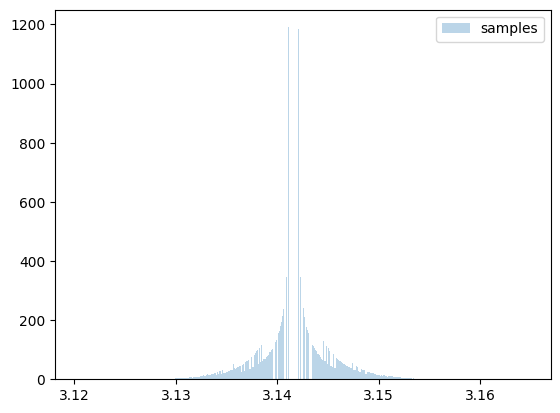

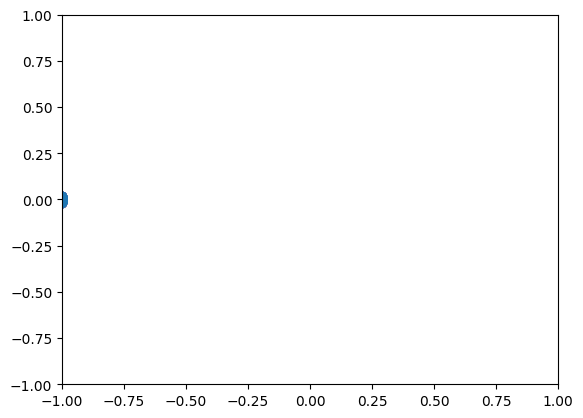

tensor([5.9316])

In [ ]:
from power_spherical import HypersphericalUniform, PowerSpherical
import torch
import math
from matplotlib import pyplot as plt

loc = torch.tensor([-1.0, 0.0])
scale = torch.tensor([1e5])
dist = PowerSpherical(loc, scale)

x = dist.sample((1000000,)).squeeze()
print(x.shape)
plt.hist(
    (lambda v: torch.where(v > 0, v, 2 * math.pi + v))(torch.atan2(x[:, 1], x[:, 0])),
    density=True,
    bins=1000,
    alpha=0.3,
    label="samples",
)

plt.legend()
plt.show()

plt.figure()
plt.scatter(x[:, 0], x[:, 1], alpha=0.01)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

ref = HypersphericalUniform(2)

torch.distributions.kl.kl_divergence(dist, ref)

torch.Size([10000])


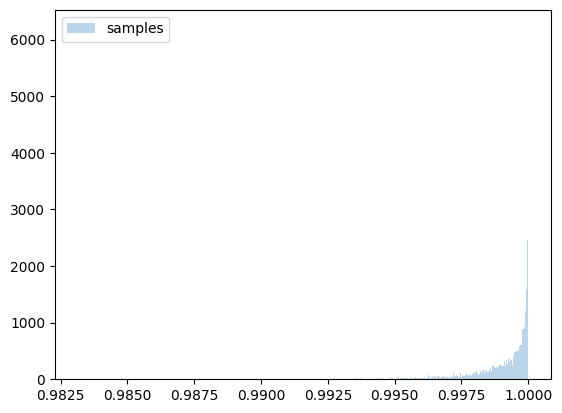

In [37]:
from power_spherical import HypersphericalUniform, PowerSpherical, MarginalTDistribution
import torch
import math
from matplotlib import pyplot as plt

loc = torch.tensor([2])
scale = torch.tensor([1e3])
dist = MarginalTDistribution(loc, scale)

x = dist.sample((10000,)).squeeze()
print(x.shape)
plt.hist(
    x,
    density=True,
    bins=1000,
    alpha=0.3,
    label="samples",
)

plt.legend()
plt.show()